In [25]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df_basic=pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\heart_disease_cleaned_basic.csv")
df_advanced=pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\heart_disease_cleaned_advanced.csv")
df_optimized=pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\_optimized_advanced_heart_disease_cleaned.csv")


In [27]:
df_advanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    bool   
 7   restecg   920 non-null    object 
 8   thalch    920 non-null    float64
 9   exang     920 non-null    bool   
 10  oldpeak   920 non-null    float64
 11  slope     920 non-null    int64  
 12  ca        920 non-null    int64  
 13  thal      920 non-null    int64  
 14  target    920 non-null    int64  
dtypes: bool(2), float64(4), int64(5), object(4)
memory usage: 95.4+ KB


Check for categorical features


In [28]:

cat_cols_basic = df_basic.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns of Basic Dataset:", cat_cols_basic.to_list())

cat_cols_advanced = df_advanced.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns of Advanced Dataset:", cat_cols_advanced.to_list())

cat_cols_optimized = df_optimized.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns of Optimized Dataset:", cat_cols_optimized.to_list())


Categorical Columns of Basic Dataset: ['sex', 'dataset', 'cp', 'restecg']
Categorical Columns of Advanced Dataset: ['sex', 'dataset', 'cp', 'restecg']
Categorical Columns of Optimized Dataset: ['sex', 'dataset', 'cp', 'restecg']


In [29]:
# Function to encode categorical variables
from sklearn.preprocessing import LabelEncoder
def encode_categorical(df):
    df = df.copy()
    
    # Label Encoding for binary categorical columns
    label_cols = ['sex', 'fbs', 'restecg', 'exang']
    le = LabelEncoder()
    for col in label_cols:
        df[col] = le.fit_transform(df[col])  # Convert to 0/1
    
    # One-Hot Encoding for nominal categorical columns
    one_hot_cols = ['dataset', 'cp']
    df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)  # Avoid dummy variable trap

    # Convert boolean to integer (0/1)
    df = df.astype(int)

    # Rename columns to avoid spaces
    df.columns = df.columns.str.replace(' ', '_')

    return df

In [30]:
# Apply encoding to all datasets
df_basic = encode_categorical(df_basic)
df_advanced = encode_categorical(df_advanced)
df_optimized = encode_categorical(df_optimized)

# Ensure all datasets have the same columns
common_cols = list(set(df_basic.columns) & set(df_advanced.columns) & set(df_optimized.columns))
df_basic = df_basic[common_cols]
df_advanced = df_advanced[common_cols]
df_optimized = df_optimized[common_cols]

In [31]:
# Verify the transformed data
print(df_basic.head())
print(df_advanced.head())
print(df_optimized.head())


   thalch  dataset_VA_Long_Beach  cp_typical_angina  age  restecg  target  \
0     150                      0                  1   63        0       0   
1     108                      0                  0   67        0       2   
2     129                      0                  0   67        0       1   
3     187                      0                  0   37        1       0   
4     172                      0                  0   41        0       0   

   dataset_Switzerland  fbs  dataset_Hungary  oldpeak  trestbps  \
0                    0    1                0        2       145   
1                    0    0                0        1       160   
2                    0    0                0        2       120   
3                    0    0                0        3       130   
4                    0    0                0        1       130   

   cp_non-anginal  chol  cp_atypical_angina  sex  exang  
0               0   233                   0    1      0  
1               0 

In [32]:
import pandas as pd

# Save the datasets as CSV files in the current directory
df_basic.to_csv("converted_heart_disease_cleaned_basic.csv", index=False)
df_advanced.to_csv("converted_heart_disease_cleaned_advanced.csv", index=False)
df_optimized.to_csv("converted_optimized_advanced_heart_disease_cleaned.csv", index=False)

print("Datasets have been saved successfully!")


Datasets have been saved successfully!


PCA

In [33]:
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [34]:
# Load datasets
df_pca_basic = pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\converted_heart_disease_cleaned_basic.csv")
df_pca_advanced = pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\converted_heart_disease_cleaned_basic.csv")
df_pca_optimized = pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\converted_optimized_advanced_heart_disease_cleaned.csv")

In [42]:
def preprocess_and_apply_pca(df, dataset_name):
    # Drop non-numeric columns if not encoded
    df_numeric = df.select_dtypes(include=[np.number])
    df = df.drop(columns=drop_columns, errors='ignore')
    
    # Standardize the features
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_numeric)
    
    # Compute Correlation Matrix
    corr_matrix = pd.DataFrame(df_numeric.corr())
    print(f"Correlation Matrix for {dataset_name} Dataset:")
    print(corr_matrix, "\n")
    
    # Compute and display Correlation Matrix
    corr_matrix = pd.DataFrame(df_numeric.corr(), columns=df_numeric.columns, index=df_numeric.columns)
    print(f"\n🔹 Correlation Matrix for {dataset_name} Dataset:")
    print(corr_matrix)

    # Plot correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
    plt.title(f"Correlation Matrix - {dataset_name}")
    plt.show()

    # Apply PCA
    pca = PCA()
    principal_components = pca.fit_transform(df_scaled)

    # Explained Variance
    explained_variance = np.cumsum(pca.explained_variance_ratio_)

    # Scree plot (explained variance)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.title(f"Scree Plot - {dataset_name}")
    plt.axhline(y=0.95, color='r', linestyle='--')  # Show 95% variance threshold
    plt.show()

    # Determine the optimal number of components (95% variance)
    optimal_components = np.argmax(explained_variance >= 0.95) + 1
    print(f"Optimal number of components for {dataset_name}: {optimal_components}\n")

    # Apply PCA with optimal components
    pca_optimal = PCA(n_components=optimal_components)
    reduced_data = pca_optimal.fit_transform(df_scaled)

    # Show initial vs selected features
    print(f"Initial Features ({dataset_name}): {list(df_numeric.columns)}")
    print(f"Transformed Components ({dataset_name}): {optimal_components} principal components\n")

    # 2D scatter plot of first two components
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, color='blue')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"PCA Projection - {dataset_name}")
    plt.show()

    return reduced_data, pca_optimal
    

Correlation Matrix for Basic Dataset:
                         thalch  dataset_VA_Long_Beach  cp_typical_angina  \
thalch                 1.000000              -0.216790           0.100444   
dataset_VA_Long_Beach -0.216790               1.000000          -0.024183   
cp_typical_angina      0.100444              -0.024183           1.000000   
age                   -0.349715               0.326713           0.032032   
restecg               -0.161818               0.283572          -0.059625   
target                -0.349173               0.241977          -0.055896   
dataset_Switzerland   -0.249873              -0.207049          -0.031507   
fbs                   -0.026472               0.280445           0.043298   
dataset_Hungary        0.034918              -0.360287          -0.039073   
oldpeak               -0.163678               0.088688           0.009251   
trestbps              -0.104747               0.020416           0.044407   
cp_non-anginal         0.140007       

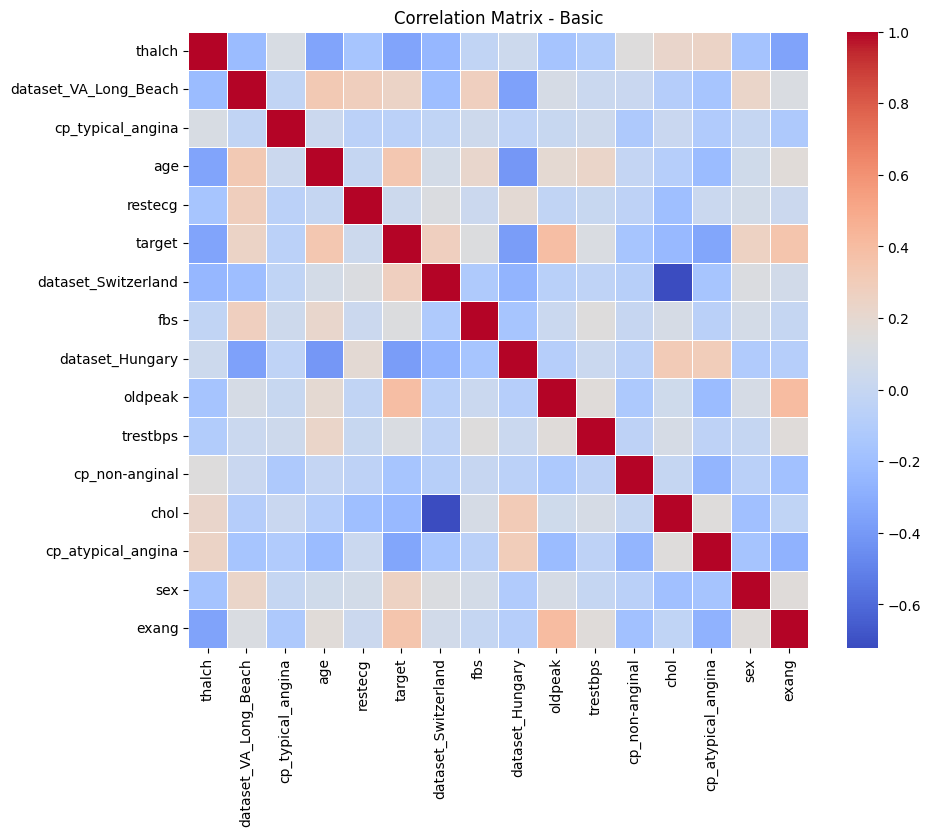

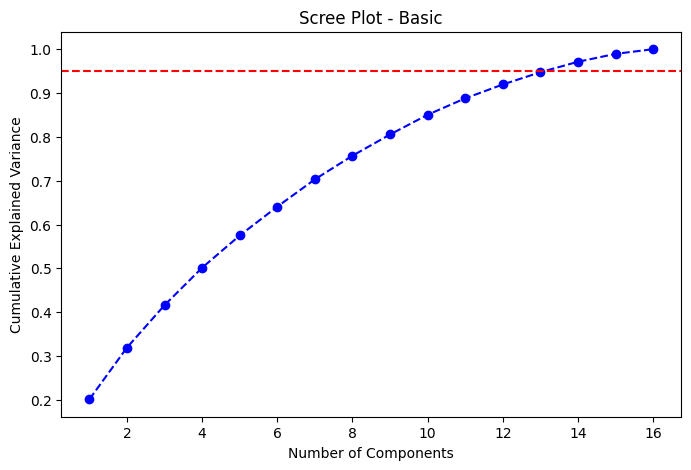

Optimal number of components for Basic: 14

Initial Features (Basic): ['thalch', 'dataset_VA_Long_Beach', 'cp_typical_angina', 'age', 'restecg', 'target', 'dataset_Switzerland', 'fbs', 'dataset_Hungary', 'oldpeak', 'trestbps', 'cp_non-anginal', 'chol', 'cp_atypical_angina', 'sex', 'exang']
Transformed Components (Basic): 14 principal components



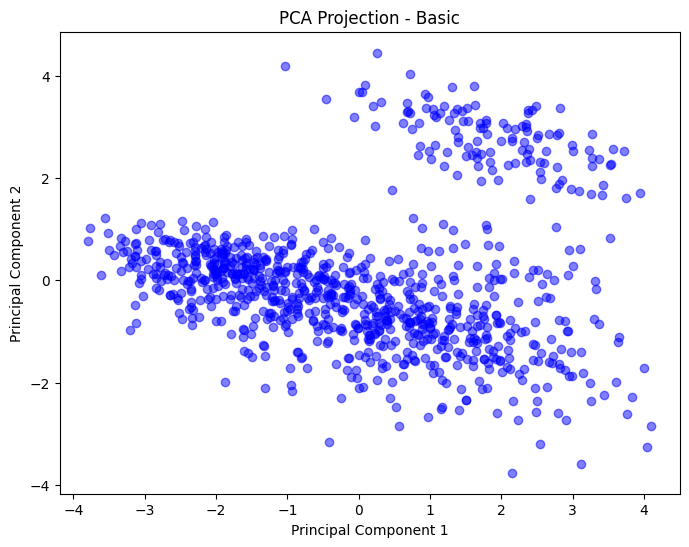

In [44]:
# Apply function to all three datasets
pca_basic, pca_basic_model = preprocess_and_apply_pca(df_pca_basic, "Basic")

    

Correlation Matrix for Advanced Dataset:
                         thalch  dataset_VA_Long_Beach  cp_typical_angina  \
thalch                 1.000000              -0.216790           0.100444   
dataset_VA_Long_Beach -0.216790               1.000000          -0.024183   
cp_typical_angina      0.100444              -0.024183           1.000000   
age                   -0.349715               0.326713           0.032032   
restecg               -0.161818               0.283572          -0.059625   
target                -0.349173               0.241977          -0.055896   
dataset_Switzerland   -0.249873              -0.207049          -0.031507   
fbs                   -0.026472               0.280445           0.043298   
dataset_Hungary        0.034918              -0.360287          -0.039073   
oldpeak               -0.163678               0.088688           0.009251   
trestbps              -0.104747               0.020416           0.044407   
cp_non-anginal         0.140007    

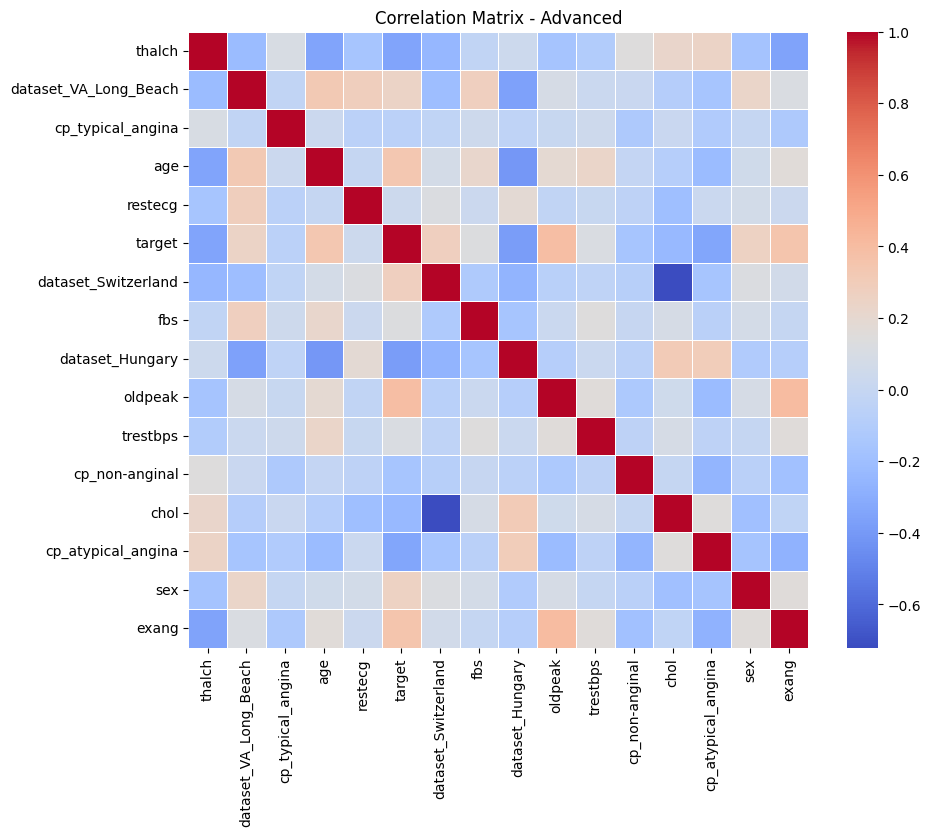

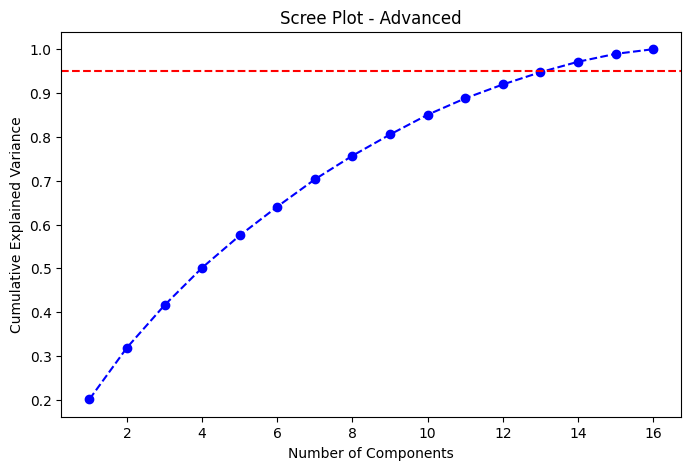

Optimal number of components for Advanced: 14

Initial Features (Advanced): ['thalch', 'dataset_VA_Long_Beach', 'cp_typical_angina', 'age', 'restecg', 'target', 'dataset_Switzerland', 'fbs', 'dataset_Hungary', 'oldpeak', 'trestbps', 'cp_non-anginal', 'chol', 'cp_atypical_angina', 'sex', 'exang']
Transformed Components (Advanced): 14 principal components



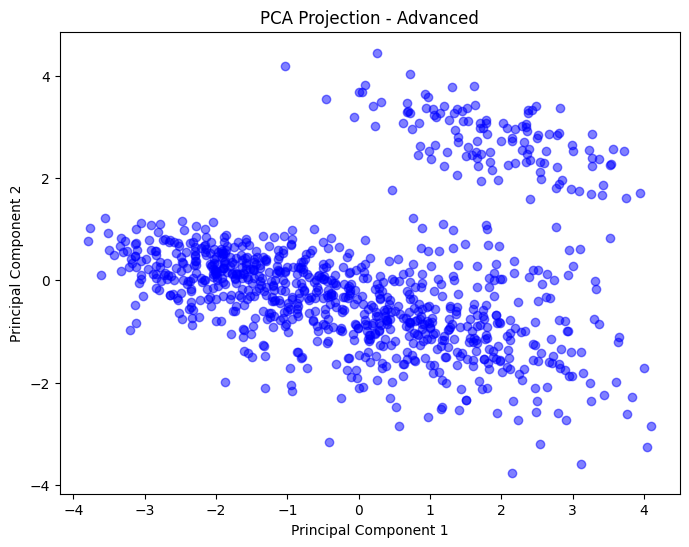

In [45]:
pca_advanced, pca_advanced_model = preprocess_and_apply_pca(df_pca_advanced, "Advanced")


Correlation Matrix for Optimized Dataset:
                         thalch  dataset_VA_Long_Beach  cp_typical_angina  \
thalch                 1.000000              -0.228315           0.107889   
dataset_VA_Long_Beach -0.228315               1.000000          -0.024183   
cp_typical_angina      0.107889              -0.024183           1.000000   
age                   -0.357817               0.326713           0.032032   
restecg               -0.148881               0.283572          -0.059625   
target                -0.347852               0.241977          -0.055896   
dataset_Switzerland   -0.245666              -0.207049          -0.031507   
fbs                   -0.029221               0.280445           0.043298   
dataset_Hungary        0.041867              -0.360287          -0.039073   
oldpeak               -0.154274               0.121354           0.010014   
trestbps              -0.094693               0.031829           0.044001   
cp_non-anginal         0.140669   

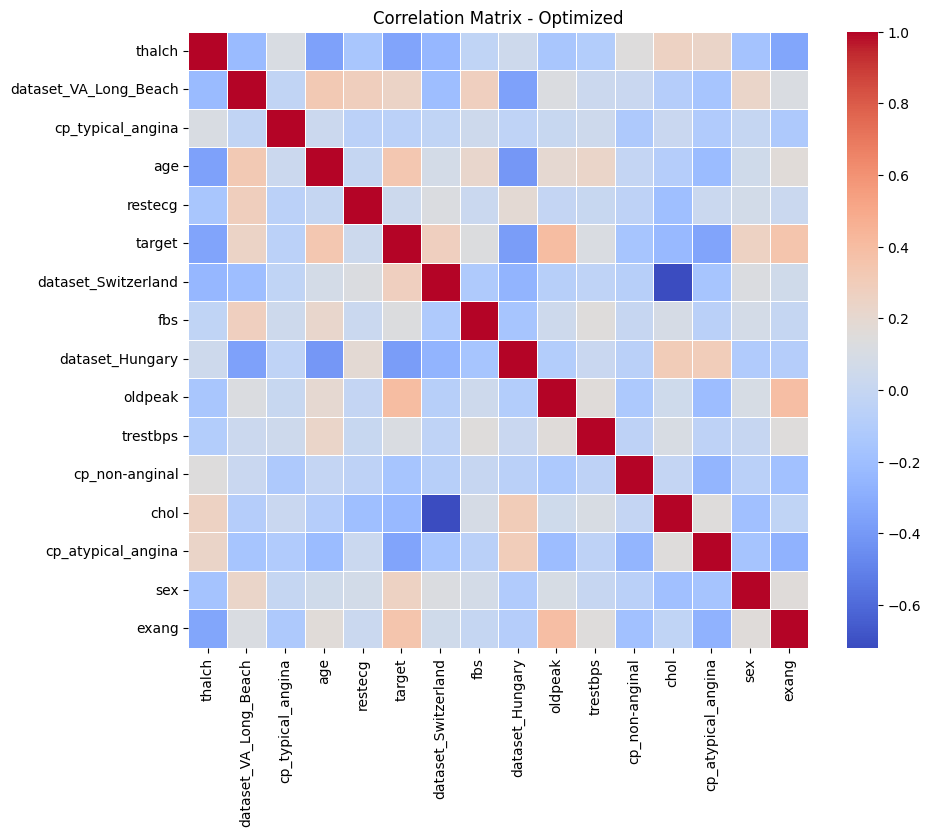

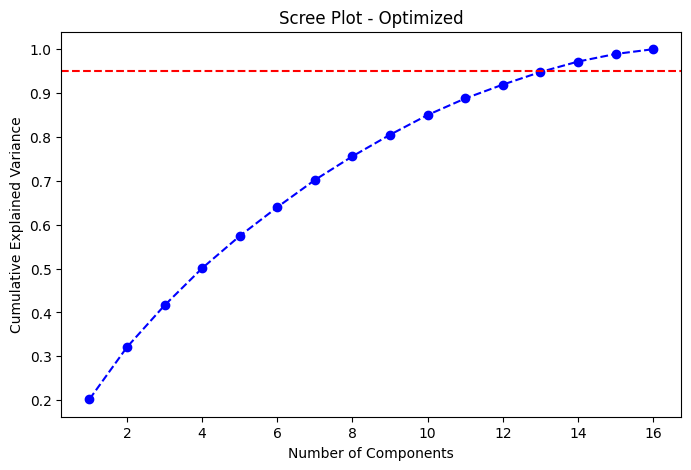

Optimal number of components for Optimized: 14

Initial Features (Optimized): ['thalch', 'dataset_VA_Long_Beach', 'cp_typical_angina', 'age', 'restecg', 'target', 'dataset_Switzerland', 'fbs', 'dataset_Hungary', 'oldpeak', 'trestbps', 'cp_non-anginal', 'chol', 'cp_atypical_angina', 'sex', 'exang']
Transformed Components (Optimized): 14 principal components



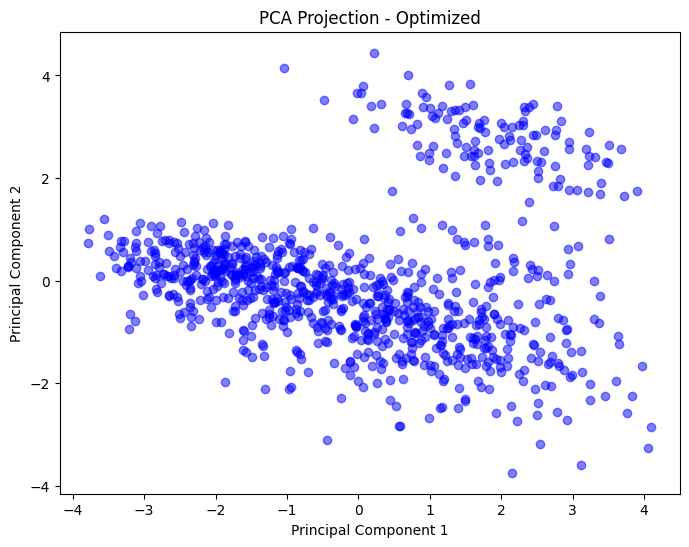

In [46]:
pca_optimized, pca_optimized_model = preprocess_and_apply_pca(df_pca_optimized, "Optimized")

In [47]:
def get_top_features(pca_model, df_numeric, dataset_name, top_n=5):
    """ Display the top contributing features for each principal component. """
    components = pd.DataFrame(pca_model.components_, columns=df_numeric.columns)

    print(f"\n🔹 Top {top_n} Contributing Features per Principal Component ({dataset_name})")
    for i, comp in enumerate(components.iterrows()):
        top_features = comp[1].abs().nlargest(top_n).index.tolist()
        print(f"PC{i+1}: {top_features}")

# Call the function for each dataset
print("\n🔹 Feature Contributions after PCA")
get_top_features(pca_basic_model, df_pca_basic.select_dtypes(include=[np.number]), "Basic")
get_top_features(pca_advanced_model, df_pca_advanced.select_dtypes(include=[np.number]), "Advanced")
get_top_features(pca_optimized_model, df_pca_optimized.select_dtypes(include=[np.number]), "Optimized")



🔹 Feature Contributions after PCA

🔹 Top 5 Contributing Features per Principal Component (Basic)
PC1: ['target', 'thalch', 'age', 'dataset_Hungary', 'cp_atypical_angina']
PC2: ['dataset_Switzerland', 'chol', 'fbs', 'oldpeak', 'trestbps']
PC3: ['cp_non-anginal', 'dataset_Hungary', 'exang', 'fbs', 'oldpeak']
PC4: ['restecg', 'dataset_VA_Long_Beach', 'cp_atypical_angina', 'oldpeak', 'dataset_Hungary']
PC5: ['cp_non-anginal', 'cp_typical_angina', 'cp_atypical_angina', 'fbs', 'trestbps']
PC6: ['trestbps', 'sex', 'age', 'cp_typical_angina', 'cp_non-anginal']
PC7: ['cp_typical_angina', 'cp_atypical_angina', 'restecg', 'dataset_Hungary', 'trestbps']
PC8: ['sex', 'trestbps', 'fbs', 'restecg', 'cp_typical_angina']
PC9: ['thalch', 'oldpeak', 'restecg', 'age', 'sex']
PC10: ['fbs', 'trestbps', 'sex', 'dataset_VA_Long_Beach', 'cp_atypical_angina']
PC11: ['exang', 'oldpeak', 'target', 'age', 'dataset_Hungary']
PC12: ['target', 'oldpeak', 'chol', 'cp_atypical_angina', 'exang']
PC13: ['age', 'thalch',